In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the path as needed. In Jupyter, .gz CSVs can be read directly.
df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', low_memory=False)


Dataset shape: (2260701, 151)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN

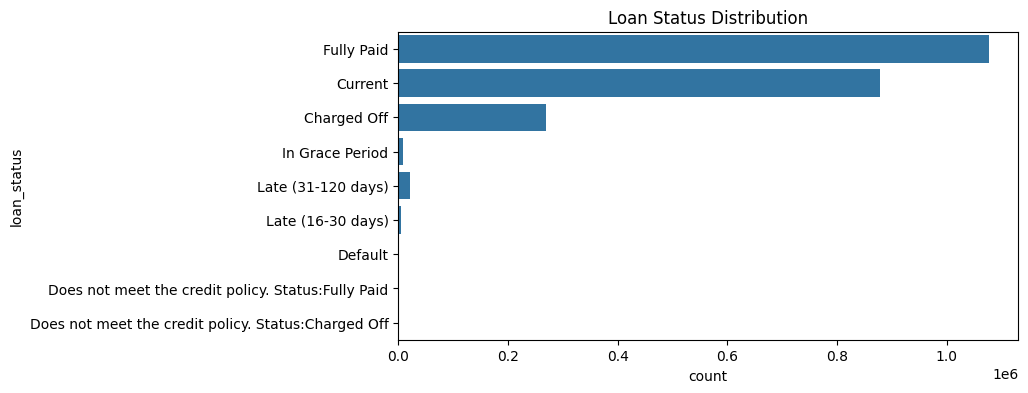

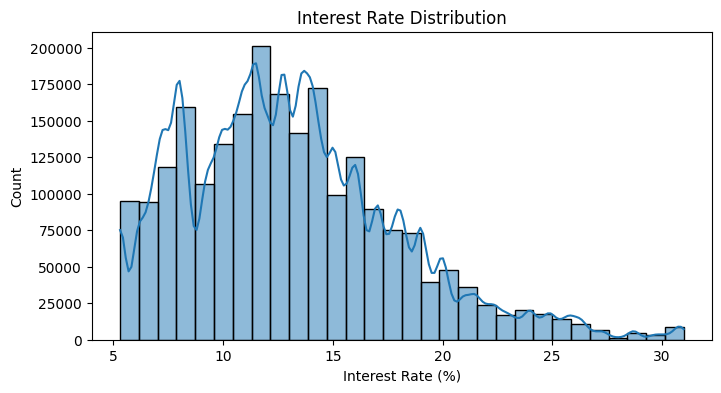

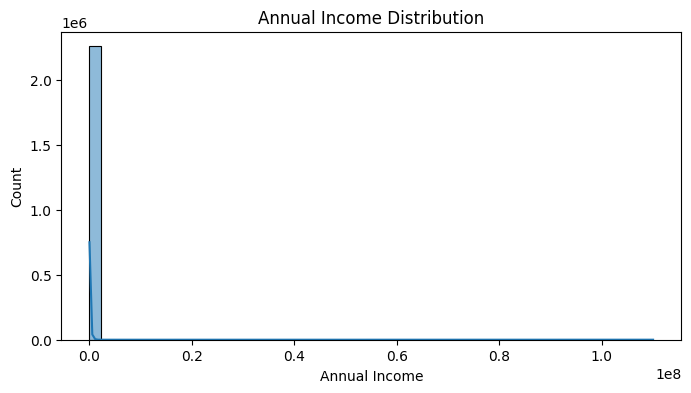

Columns with most missing values:
 member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_reason                               2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
payment_plan_start_date                       2249784
hardship_type                                 2249784
hardship_status                               2249784
hardship_start_date                           2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_dpd                                  2249784
hardship_loan_status                          2249784
hardship_length                               2249784
hardship_end_date                             2249784
settlement_status                             2226455
debt_settlement_flag_date                     2226455
settlement_term                               2

In [3]:
# Check basic info
print("Dataset shape:", df.shape)
df.info()

# Preview the data
print(df.head())

# Analyze target variable distribution
print(df['loan_status'].value_counts())
plt.figure(figsize=(8,4))
sns.countplot(y='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Distribution of interest rate
plt.figure(figsize=(8,4))
sns.histplot(df['int_rate'].dropna(), bins=30, kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.show()

# Applicant income distribution (annual_inc)
plt.figure(figsize=(8,4))
sns.histplot(df['annual_inc'].dropna(), bins=50, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()

# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Columns with most missing values:\n", missing_values.head(20))


In [8]:
selected_features = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'loan_status'
]
df_selected = df[selected_features].copy()


In [9]:
# Drop rows with missing values in critical columns
critical_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']
df_selected = df_selected.dropna(subset=critical_columns)

# Fix emp_length to numeric values
def clean_emp_length(x):
    if pd.isnull(x):
        return np.nan
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    else:
        try:
            return int(x.split()[0])
        except:
            return np.nan

df_selected['emp_length'] = df_selected['emp_length'].apply(clean_emp_length)

# Encode categorical variables
categorical_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']
df_selected = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaling_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length']
df_selected[scaling_cols] = scaler.fit_transform(df_selected[scaling_cols])

# Check cleaned dataframe
print(df_selected.head())
print("Remaining missing values:\n", df_selected.isnull().sum())


   loan_amnt  int_rate  emp_length  annual_inc       dti loan_status  \
0  -1.245515  0.185873    1.093640   -0.204505 -0.910522  Fully Paid   
1   1.050942 -0.228087    1.093640   -0.115789 -0.194893  Fully Paid   
2   0.539409 -0.478532    1.093640   -0.133532 -0.567161  Fully Paid   
3   2.171960  0.363876    1.093640    0.283436 -0.124387     Current   
4  -0.505424  1.936923   -0.788002    0.234048  0.461512  Fully Paid   

   term_ 60 months  grade_B  grade_C  grade_D  ...  purpose_home_improvement  \
0            False    False     True    False  ...                     False   
1            False    False     True    False  ...                     False   
2             True     True    False    False  ...                      True   
3             True    False     True    False  ...                     False   
4             True    False    False    False  ...                     False   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0        

TASK 2


In [10]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Check data types
print("Data types in X:")
print(X.dtypes)
print("\nColumns with object dtype:")
print(X.select_dtypes(include=['object']).columns.tolist())

# Check for any remaining non-numeric values
print("\nChecking for non-numeric values...")
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"{col}: {X[col].unique()[:10]}")


Data types in X:
loan_amnt                   float64
int_rate                    float64
emp_length                  float64
annual_inc                  float64
dti                         float64
                             ...   
purpose_other               float64
purpose_renewable_energy    float64
purpose_small_business      float64
purpose_vacation            float64
purpose_wedding             float64
Length: 66, dtype: object

Columns with object dtype:
[]

Checking for non-numeric values...


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define binary target: 0 = Fully Paid, 1 = Default
# Map various default statuses to 1, and paid statuses to 0
def create_binary_target(loan_status):
    default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 
                        'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']
    paid_statuses = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
    
    if loan_status in default_statuses:
        return 1
    elif loan_status in paid_statuses:
        return 0
    else:
        return np.nan  # Remove current loans or other statuses

# Apply transformation
df_selected['target'] = df_selected['loan_status'].apply(create_binary_target)

# Remove rows with NaN targets (current loans)
df_model = df_selected.dropna(subset=['target']).copy()

# Drop the original loan_status column
X = df_model.drop(['loan_status', 'target'], axis=1)
y = df_model['target']

# Check class distribution
print("Class distribution:")
print(y.value_counts())
print(f"Default rate: {y.mean():.2%}")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Class distribution:
target
0.0    1078432
1.0     295076
Name: count, dtype: int64
Default rate: 21.48%

Training set size: 1098806
Test set size: 274702


In [13]:
# After creating df_selected and before creating target

# Identify categorical columns
categorical_cols = df_selected.select_dtypes(include=['object']).columns.tolist()
# Remove 'loan_status' as it's our target base
if 'loan_status' in categorical_cols:
    categorical_cols.remove('loan_status')

print(f"Categorical columns to encode: {categorical_cols}")

# One-hot encode all categorical variables
df_selected = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)

# Now create target
df_selected['target'] = df_selected['loan_status'].apply(create_binary_target)
df_model = df_selected.dropna(subset=['target']).copy()

# Drop loan_status
X = df_model.drop(['loan_status', 'target'], axis=1)
y = df_model['target']

# Verify all columns are numeric
print("\nData types after encoding:")
print(X.dtypes.value_counts())
assert X.select_dtypes(include=['object']).shape[1] == 0, "Still have object columns!"


Categorical columns to encode: []

Data types after encoding:
bool       61
float64     5
Name: count, dtype: int64


In [14]:
# Calculate class weights for imbalanced dataset
class_counts = np.bincount(y_train.astype(int))
class_weights = len(y_train) / (len(class_counts) * class_counts)
class_weights_tensor = torch.FloatTensor(class_weights)

print(f"Class weights: {class_weights}")



Class weights: [0.6368081  2.32737725]


In [15]:
# Force all columns to numeric, coercing errors to NaN
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill any NaN values created during conversion
X = X.fillna(X.median())

# Verify all numeric
print("Final data types:")
print(X.dtypes.value_counts())


Final data types:
bool       61
float64     5
Name: count, dtype: int64


In [16]:
# After initial EDA, select features
selected_features = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'loan_status'
]
df_selected = df[selected_features].copy()

# Drop rows with critical missing values
critical_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']
df_selected = df_selected.dropna(subset=critical_columns)

# Clean employment length
def clean_employment_length(x):
    if pd.isnull(x):
        return np.nan
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    else:
        try:
            return int(x.split()[0])
        except:
            return np.nan

if 'emp_length' in df_selected.columns:
    df_selected['emp_length'] = df_selected['emp_length'].apply(clean_employment_length)

# Remove percentage signs from interest rate if present
if df_selected['int_rate'].dtype == 'object':
    df_selected['int_rate'] = df_selected['int_rate'].str.rstrip('%').astype('float')

# Identify and encode categorical columns (before target creation)
categorical_cols = df_selected.select_dtypes(include=['object']).columns.tolist()
if 'loan_status' in categorical_cols:
    categorical_cols.remove('loan_status')

print(f"Encoding categorical columns: {categorical_cols}")
df_selected = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)

# Create binary target
def create_binary_target(loan_status):
    default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 
                        'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']
    paid_statuses = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
    
    if loan_status in default_statuses:
        return 1
    elif loan_status in paid_statuses:
        return 0
    else:
        return np.nan

df_selected['target'] = df_selected['loan_status'].apply(create_binary_target)
df_model = df_selected.dropna(subset=['target']).copy()

# Prepare features and target
X = df_model.drop(['loan_status', 'target'], axis=1)
y = df_model['target']

# Final check: ensure all numeric
print("Checking data types...")
print(X.dtypes.value_counts())

# Convert any remaining object columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')
        print(f"Converted {col} to numeric")

# Handle any NaN values
X = X.fillna(X.median())

# Feature scaling (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X = X_scaled

print(f"\nFinal X shape: {X.shape}")
print(f"All columns numeric: {X.select_dtypes(include=['object']).shape[1] == 0}")

# Now proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to PyTorch tensors (this should now work)
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

print("Tensor conversion successful!")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")


Encoding categorical columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']
Checking data types...
bool       61
float64     5
Name: count, dtype: int64

Final X shape: (1373508, 66)
All columns numeric: True
Tensor conversion successful!
X_train_tensor shape: torch.Size([1098806, 66])
y_train_tensor shape: torch.Size([1098806, 1])


In [17]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [18]:
class OptimizedMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128, 64, 32], dropout_rate=0.3):
        super(OptimizedMLP, self).__init__()
        
        layers = []
        prev_dim = input_dim
        
        # Build hidden layers with BatchNorm and Dropout
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_dim = hidden_dim
        
        # Output layer (no activation - BCEWithLogitsLoss includes sigmoid)
        layers.append(nn.Linear(prev_dim, 1))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Initialize model
input_dim = X_train.shape[1]
model = OptimizedMLP(input_dim=input_dim, hidden_dims=[256, 128, 64, 32], dropout_rate=0.3)

print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")


OptimizedMLP(
  (network): Sequential(
    (0): Linear(in_features=66, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=32, out_features=1, bias=True)
  )
)

Total parameters: 61377


In [20]:
# Loss function with class weights
pos_weight = torch.tensor([class_weights[1] / class_weights[0]])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Optimizer with weight decay for regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                   factor=0.5, patience=3)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

print(f"Using device: {device}")


Using device: cpu


In [21]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            running_loss += loss.item() * X_batch.size(0)
            
            # Get probabilities and predictions
            probs = torch.sigmoid(outputs)
            preds = (probs >= 0.5).float()
            
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    epoch_loss = running_loss / len(test_loader.dataset)
    return epoch_loss, np.array(all_preds), np.array(all_labels), np.array(all_probs)

# Training loop
num_epochs = 50
train_losses = []
test_losses = []
best_auc = 0.0

print("Starting training...\n")

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    test_loss, test_preds, test_labels, test_probs = evaluate(model, test_loader, criterion, device)
    
    # Calculate metrics
    auc = roc_auc_score(test_labels, test_probs)
    f1 = f1_score(test_labels, test_preds)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    # Update learning rate
    scheduler.step(test_loss)
    
    # Save best model
    if auc > best_auc:
        best_auc = auc
        torch.save(model.state_dict(), 'best_model.pth')
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'  Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}')
        print(f'  AUC: {auc:.4f} | F1-Score: {f1:.4f}')
        print()

print(f"Training completed. Best AUC: {best_auc:.4f}")


Starting training...

Epoch [5/50]
  Train Loss: 0.9839 | Test Loss: 0.9846
  AUC: 0.7038 | F1-Score: 0.4398

Epoch [10/50]
  Train Loss: 0.9816 | Test Loss: 0.9806
  AUC: 0.7063 | F1-Score: 0.4428

Epoch [15/50]
  Train Loss: 0.9805 | Test Loss: 0.9803
  AUC: 0.7074 | F1-Score: 0.4436

Epoch [20/50]
  Train Loss: 0.9794 | Test Loss: 0.9793
  AUC: 0.7082 | F1-Score: 0.4449

Epoch [25/50]
  Train Loss: 0.9770 | Test Loss: 0.9801
  AUC: 0.7090 | F1-Score: 0.4450

Epoch [30/50]
  Train Loss: 0.9765 | Test Loss: 0.9800
  AUC: 0.7088 | F1-Score: 0.4447

Epoch [35/50]
  Train Loss: 0.9747 | Test Loss: 0.9771
  AUC: 0.7097 | F1-Score: 0.4454

Epoch [40/50]
  Train Loss: 0.9745 | Test Loss: 0.9780
  AUC: 0.7099 | F1-Score: 0.4458

Epoch [45/50]
  Train Loss: 0.9730 | Test Loss: 0.9765
  AUC: 0.7104 | F1-Score: 0.4467

Epoch [50/50]
  Train Loss: 0.9728 | Test Loss: 0.9762
  AUC: 0.7105 | F1-Score: 0.4466

Training completed. Best AUC: 0.7105


FINAL MODEL PERFORMANCE
AUC-ROC Score: 0.7105
F1-Score: 0.4466

Classification Report:
              precision    recall  f1-score   support

  Fully Paid       0.87      0.65      0.74    215687
     Default       0.34      0.66      0.45     59015

    accuracy                           0.65    274702
   macro avg       0.61      0.65      0.60    274702
weighted avg       0.76      0.65      0.68    274702



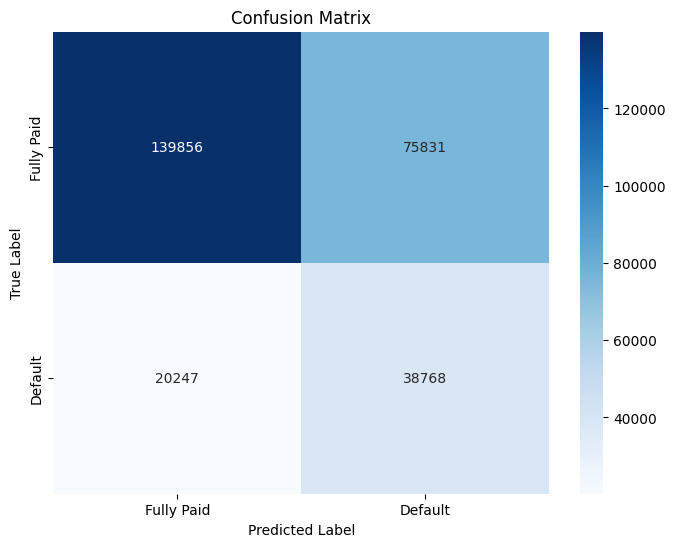

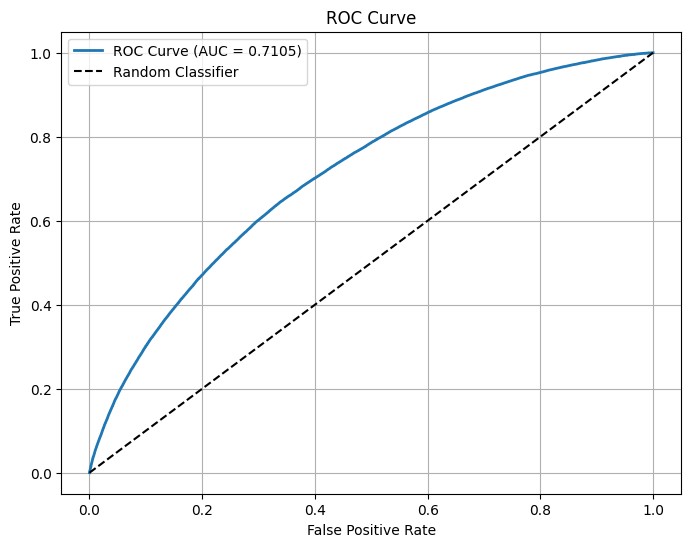

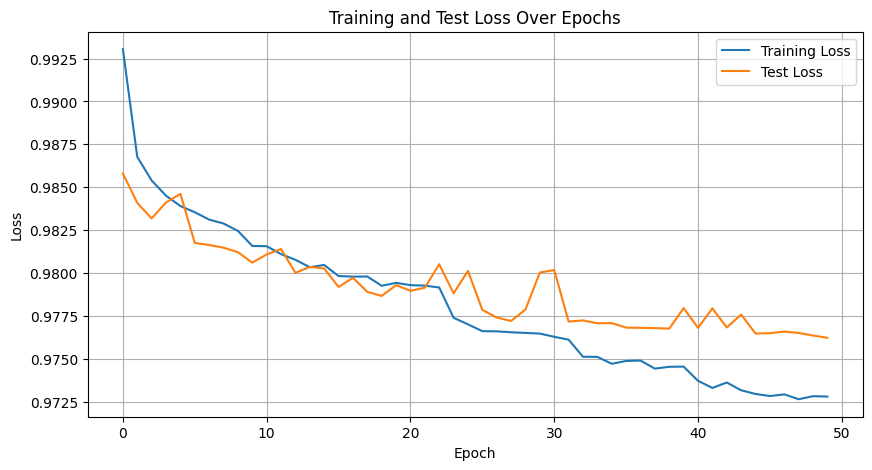

In [22]:
# Load best model
model.load_state_dict(torch.load('best_model.pth'))

# Final evaluation
_, final_preds, final_labels, final_probs = evaluate(model, test_loader, criterion, device)

# Calculate final metrics
final_auc = roc_auc_score(final_labels, final_probs)
final_f1 = f1_score(final_labels, final_preds)

print("=" * 50)
print("FINAL MODEL PERFORMANCE")
print("=" * 50)
print(f"AUC-ROC Score: {final_auc:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print("\nClassification Report:")
print(classification_report(final_labels, final_preds, target_names=['Fully Paid', 'Default']))

# Confusion Matrix
cm = confusion_matrix(final_labels, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fully Paid', 'Default'],
            yticklabels=['Fully Paid', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(final_labels, final_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {final_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


TASK 3

In [23]:
# Install d3rlpy for offline RL
!pip install d3rlpy


  Obtaining dependency information for d3rlpy from https://files.pythonhosted.org/packages/66/79/0fd89cc09af9c8b059bf25a658de646953997be7b4ef50c5dd2cf930d832/d3rlpy-2.8.1-py3-none-any.whl.metadata
  Using cached d3rlpy-2.8.1-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for tqdm>=4.66.3 from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/23/95/499b4e56452ef8b6c95a271af0dde08dac4ddb70515a75f346d4f400579b/h5py-3.15.1-cp311-cp311-win_amd64.whl.metadata
  Using cached h5py-3.15.1-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached gym-0.26.2-py3-none-any.whl
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/db/d3/9dcc0f5797f070ec8edf30fbadfb200e71d9db6b84d211e3b2085a7589a0/clic


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import CQLConfig

print("Step 1: Prepare RL Dataset")
print("=" * 60)

# Prepare states, actions, rewards, and terminals
states = df_rl.drop(['loan_status', 'target', 'action', 
                     'loan_amnt_original', 'int_rate_original'], 
                    axis=1, errors='ignore').values.astype(np.float32)

actions = df_rl['action'].values.astype(np.int64)
rewards = df_rl.apply(calculate_reward, axis=1).values.astype(np.float32)
terminals = np.ones(len(df_rl), dtype=np.float32)

print(f"States shape: {states.shape}")
print(f"Actions shape: {actions.shape}")
print(f"Rewards - Mean: {rewards.mean():.2f}, Std: {rewards.std():.2f}")
print(f"Rewards - Min: {rewards.min():.2f}, Max: {rewards.max():.2f}")
print(f"Action distribution:\n{pd.Series(actions).value_counts()}")

# Create full dataset
print("\nCreating MDPDataset...")
dataset = MDPDataset(
    observations=states,
    actions=actions.reshape(-1, 1),
    rewards=rewards,
    terminals=terminals
)

print("MDPDataset created successfully")
print(f"Dataset size: {len(dataset)}")


Preparing RL dataset...
Action distribution: action
1    1177169
0     196339
Name: count, dtype: int64


In [33]:
# Prepare states, actions, rewards, and terminals
states = df_rl.drop(['loan_status', 'target', 'action', 
                     'loan_amnt_original', 'int_rate_original'], 
                    axis=1, errors='ignore').values

actions = df_rl['action'].values
rewards = df_rl.apply(calculate_reward, axis=1).values

# All episodes are terminal (each loan is independent decision)
terminals = np.ones(len(df_rl), dtype=np.float32)

# Create MDPDataset for d3rlpy
# For episodic data where each loan is one episode
episodes = []
for i in range(len(states)):
    episode = {
        'observations': states[i:i+1],
        'actions': np.array([actions[i]]),
        'rewards': np.array([rewards[i]]),
        'terminals': np.array([1.0])  # Each loan is terminal
    }
    episodes.append(episode)

# Alternative: Create dataset using from_episodes
dataset = MDPDataset(
    observations=states,
    actions=actions.reshape(-1, 1),
    rewards=rewards,
    terminals=terminals
)

print(f"\nDataset created:")
print(f"  States shape: {states.shape}")
print(f"  Actions shape: {actions.shape}")
print(f"  Rewards - Mean: {rewards.mean():.2f}, Std: {rewards.std():.2f}")
print(f"  Rewards - Min: {rewards.min():.2f}, Max: {rewards.max():.2f}")


2025-10-30 13:41.58 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('O')], shape=[(66,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-10-30 13:41.58 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 13:42.01 [info     ] Action size has been automatically determined. action_size=2

Dataset created:
  States shape: (1373508, 66)
  Actions shape: (1373508,)
  Rewards - Mean: -908.10, Std: 9563.90
  Rewards - Min: -39999.58, Max: 9985.26


In [37]:
print("\nStep 2: Split Dataset")
print("=" * 60)

n = states.shape[0]
indices = np.arange(n)
np.random.seed(42)
np.random.shuffle(indices)

# Calculate split point
#total_size = len(dataset)
train_size = int(0.8 * n)
test_size = n - train_size

print(f"Total samples: {n}")
print(f"Train size: {train_size}")
print(f"Test size: {test_size}")

# Split the data arrays (before creating datasets)
train_states = states[:train_size]
train_actions = actions[:train_size]
train_rewards = rewards[:train_size]
train_terminals = terminals[:train_size]

test_states = states[train_size:]
test_actions = actions[train_size:]
test_rewards = rewards[train_size:]
test_terminals = terminals[train_size:]

# Create separate datasets
train_dataset = MDPDataset(
    observations=train_states,
    actions=train_actions.reshape(-1, 1),
    rewards=train_rewards,
    terminals=train_terminals
)

test_dataset = MDPDataset(
    observations=test_states,
    actions=test_actions.reshape(-1, 1),
    rewards=test_rewards,
    terminals=test_terminals
)

print(f"\nTotal samples: {n}")
print(f"Train size: {train_size}")
print(f"Test size: {n - train_size}")



Step 2: Split Dataset
Total samples: 1373508
Train size: 1098806
Test size: 274702
2025-10-30 13:48.43 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('O')], shape=[(66,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-10-30 13:48.43 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 13:48.45 [info     ] Action size has been automatically determined. action_size=2
2025-10-30 13:48.48 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('O')], shape=[(66,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-10-30 13:48.48 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 13:48.48 [info    

In [42]:
pip install inspect

ERROR: Could not find a version that satisfies the requirement inspect (from versions: none)
ERROR: No matching distribution found for inspect


Note: you may need to restart the kernel to use updated packages.


OFFLINE RL AGENT - Q-LEARNING IMPLEMENTATION

Step 1: Q-Network defined

Step 2: Prepare RL Dataset
----------------------------------------------------------------------
States shape: (1373508, 66)
Rewards - Mean: $-908.10, Std: $9563.90
Rewards - Range: [$-39999.58, $9985.26]
Action distribution:
1    1177169
0     196339
Name: count, dtype: int64

Train set: 1098806 samples
Test set: 274702 samples
Batch size: 256

Step 3: Initialize Q-Network
----------------------------------------------------------------------
Device: cpu
Q-Network parameters: 58,434
Optimizer: Adam (lr=1e-4)
Loss function: MSELoss

Step 4: Train Q-Network
----------------------------------------------------------------------
Training for 50 epochs...
Epoch [10/50] - Train Loss: nan, Test Loss: nan
Epoch [20/50] - Train Loss: nan, Test Loss: nan
Epoch [30/50] - Train Loss: nan, Test Loss: nan
Epoch [40/50] - Train Loss: nan, Test Loss: nan
Epoch [50/50] - Train Loss: nan, Test Loss: nan

Training completed!
Model

d:\lendingclub-offline-rl\venv\Lib\site-packages\matplotlib\axes\_axes.py:7104: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
d:\lendingclub-offline-rl\venv\Lib\site-packages\matplotlib\axes\_axes.py:7105: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

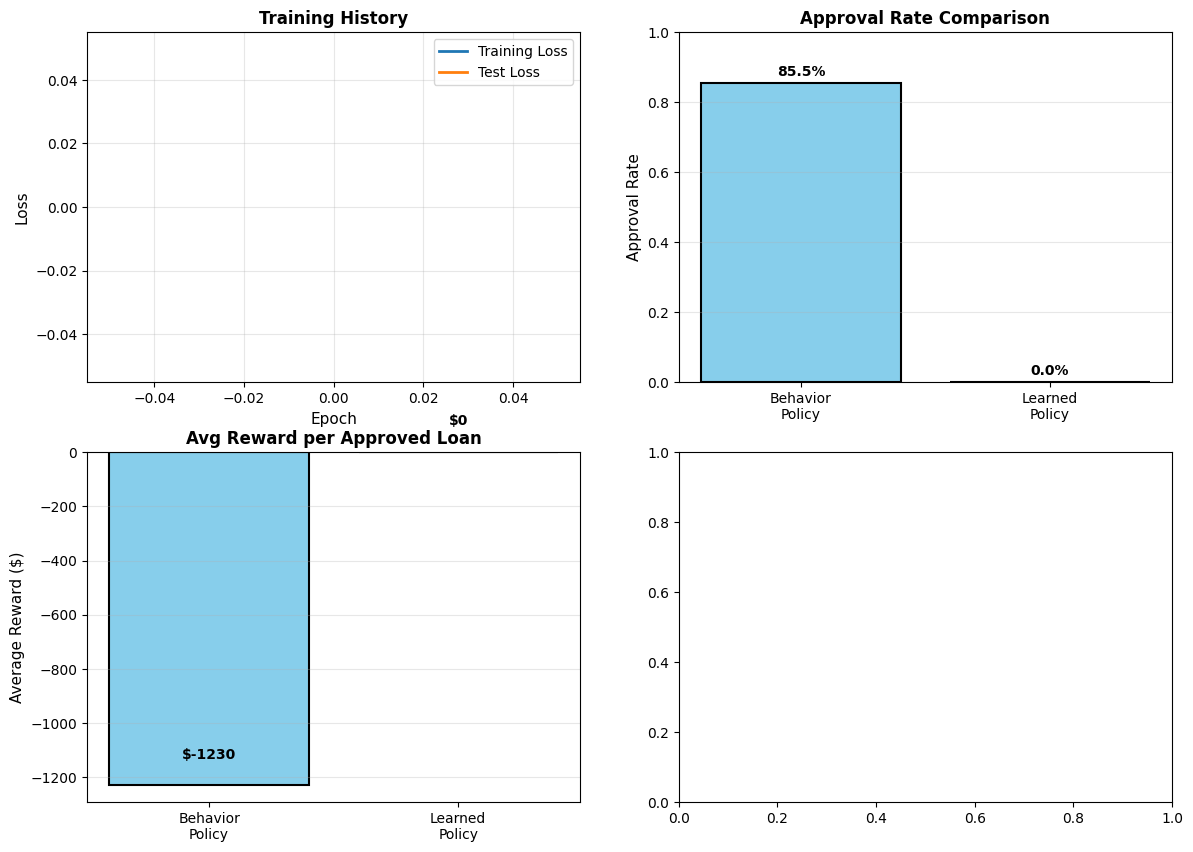

In [51]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

print("OFFLINE RL AGENT - Q-LEARNING IMPLEMENTATION")
print("=" * 70)

# ============================================================================
# STEP 1: Define Q-Network Architecture
# ============================================================================

class QNetwork(nn.Module):
    """Deep Q-Network for learning loan approval policy"""
    def __init__(self, input_dim, hidden_dims=[256, 128, 64], dropout_rate=0.2):
        super(QNetwork, self).__init__()
        
        layers = []
        prev_dim = input_dim
        
        # Hidden layers
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_dim = hidden_dim
        
        # Output layer: Q-values for 2 actions (0=Deny, 1=Approve)
        layers.append(nn.Linear(prev_dim, 2))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)
    
    def select_action(self, state, epsilon=0.0):
        """Epsilon-greedy action selection"""
        if np.random.random() < epsilon:
            return np.random.randint(2)
        else:
            with torch.no_grad():
                q_values = self.forward(state)
                return q_values.argmax(dim=1).item()

print("\nStep 1: Q-Network defined")

# ============================================================================
# STEP 2: Prepare Data
# ============================================================================

print("\nStep 2: Prepare RL Dataset")
print("-" * 70)

# Get features and targets
states = df_rl.drop(['loan_status', 'target', 'action', 
                     'loan_amnt_original', 'int_rate_original'], 
                    axis=1, errors='ignore').values.astype(np.float32)

actions = df_rl['action'].values.astype(np.int64)
rewards = df_rl.apply(calculate_reward, axis=1).values.astype(np.float32)

print(f"States shape: {states.shape}")
print(f"Rewards - Mean: ${rewards.mean():.2f}, Std: ${rewards.std():.2f}")
print(f"Rewards - Range: [${rewards.min():.2f}, ${rewards.max():.2f}]")
print(f"Action distribution:\n{pd.Series(actions).value_counts()}")

# Split into train and test
train_size = int(0.8 * len(states))

train_states = states[:train_size]
train_actions = actions[:train_size]
train_rewards = rewards[:train_size]

test_states = states[train_size:]
test_actions = actions[train_size:]
test_rewards = rewards[train_size:]

# Convert to tensors
train_states_tensor = torch.FloatTensor(train_states)
train_actions_tensor = torch.LongTensor(train_actions)
train_rewards_tensor = torch.FloatTensor(train_rewards)

test_states_tensor = torch.FloatTensor(test_states)
test_actions_tensor = torch.LongTensor(test_actions)
test_rewards_tensor = torch.FloatTensor(test_rewards)

# Create DataLoaders
batch_size = 256
train_dataset = TensorDataset(train_states_tensor, train_actions_tensor, train_rewards_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print(f"\nTrain set: {len(train_states)} samples")
print(f"Test set: {len(test_states)} samples")
print(f"Batch size: {batch_size}")

# ============================================================================
# STEP 3: Initialize Q-Network and Training Components
# ============================================================================

print("\nStep 3: Initialize Q-Network")
print("-" * 70)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Create networks
q_network = QNetwork(input_dim=train_states.shape[1], hidden_dims=[256, 128, 64]).to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(q_network.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

print(f"Q-Network parameters: {sum(p.numel() for p in q_network.parameters()):,}")
print(f"Optimizer: Adam (lr=1e-4)")
print(f"Loss function: MSELoss")

# ============================================================================
# STEP 4: Train Q-Network (Offline RL)
# ============================================================================

print("\nStep 4: Train Q-Network")
print("-" * 70)

num_epochs = 50
gamma = 0.99  # Discount factor
train_losses = []
test_losses = []

print(f"Training for {num_epochs} epochs...")

for epoch in range(num_epochs):
    # Train phase
    q_network.train()
    train_loss = 0.0
    
    for states_batch, actions_batch, rewards_batch in train_loader:
        states_batch = states_batch.to(device)
        actions_batch = actions_batch.to(device)
        rewards_batch = rewards_batch.to(device)
        
        # Forward pass
        q_values = q_network(states_batch)
        q_selected = q_values.gather(1, actions_batch.unsqueeze(1)).squeeze(1)
        
        # Target Q-values (in offline setting, we use observed rewards as targets)
        # This is simpler than standard DQN since we don't have next states
        target_q = rewards_batch
        
        # Loss
        loss = criterion(q_selected, target_q)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(q_network.parameters(), max_norm=1.0)
        optimizer.step()
        
        train_loss += loss.item() * states_batch.size(0)
    
    train_loss /= len(train_states)
    train_losses.append(train_loss)
    
    # Test phase
    q_network.eval()
    test_loss = 0.0
    
    with torch.no_grad():
        test_states_device = test_states_tensor.to(device)
        test_actions_device = test_actions_tensor.to(device)
        test_rewards_device = test_rewards_tensor.to(device)
        
        test_q_values = q_network(test_states_device)
        test_q_selected = test_q_values.gather(1, test_actions_device.unsqueeze(1)).squeeze(1)
        test_loss = criterion(test_q_selected, test_rewards_device).item()
        test_losses.append(test_loss)
    
    # Learning rate scheduling
    scheduler.step(test_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

print("\nTraining completed!")

# Save model
torch.save(q_network.state_dict(), 'q_network_loan_policy.pt')
print("Model saved as 'q_network_loan_policy.pt'")

# ============================================================================
# STEP 5: Evaluate Learned Policy
# ============================================================================

print("\nStep 5: Evaluate Learned Policy")
print("-" * 70)

q_network.eval()

with torch.no_grad():
    test_states_device = test_states_tensor.to(device)
    q_values_test = q_network(test_states_device).cpu().numpy()

# Get predicted actions (argmax of Q-values)
predicted_actions = q_values_test.argmax(axis=1)

# Statistics
approved_by_policy = (predicted_actions == 1).sum()
approval_rate = approved_by_policy / len(predicted_actions)
behavior_approval_rate = (test_actions == 1).sum() / len(test_actions)

print(f"\nApproval Statistics:")
print(f"  Behavior policy approval rate: {behavior_approval_rate:.2%}")
print(f"  Learned policy approval rate: {approval_rate:.2%}")
print(f"  Change: {(approval_rate - behavior_approval_rate):.2%}")

# Reward analysis
approved_mask_learned = predicted_actions == 1
approved_mask_behavior = test_actions == 1

avg_reward_learned = test_rewards[approved_mask_learned].mean() if approved_mask_learned.sum() > 0 else 0
avg_reward_behavior = test_rewards[approved_mask_behavior].mean() if approved_mask_behavior.sum() > 0 else 0

print(f"\nReward Performance (Approved Loans Only):")
print(f"  Behavior policy avg reward: ${avg_reward_behavior:.2f}")
print(f"  Learned policy avg reward: ${avg_reward_learned:.2f}")

# Total rewards
total_reward_learned = test_rewards[approved_mask_learned].sum()
total_reward_behavior = test_rewards[approved_mask_behavior].sum()

print(f"\n  Behavior policy total reward: ${total_reward_behavior:,.2f}")
print(f"  Learned policy total reward: ${total_reward_learned:,.2f}")

# Decision agreement
decisions_match = (predicted_actions == test_actions).sum()
agreement_rate = decisions_match / len(predicted_actions)

print(f"\nPolicy Comparison:")
print(f"  Decision agreement: {agreement_rate:.2%}")
print(f"  Both approve: {((predicted_actions == 1) & (test_actions == 1)).sum()}")
print(f"  Both deny: {((predicted_actions == 0) & (test_actions == 0)).sum()}")
print(f"  Learned approves, behavior denies: {((predicted_actions == 1) & (test_actions == 0)).sum()}")
print(f"  Learned denies, behavior approves: {((predicted_actions == 0) & (test_actions == 1)).sum()}")

# ============================================================================
# STEP 6: Visualizations
# ============================================================================

print("\nStep 6: Generate Visualizations")
print("-" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training History
axes[0, 0].plot(train_losses, label='Training Loss', linewidth=2)
axes[0, 0].plot(test_losses, label='Test Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Loss', fontsize=11)
axes[0, 0].set_title('Training History', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Approval Rate Comparison
axes[0, 1].bar(['Behavior\nPolicy', 'Learned\nPolicy'], 
               [behavior_approval_rate, approval_rate],
               color=['skyblue', 'coral'], edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Approval Rate', fontsize=11)
axes[0, 1].set_title('Approval Rate Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate([behavior_approval_rate, approval_rate]):
    axes[0, 1].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# Plot 3: Average Reward Comparison
axes[1, 0].bar(['Behavior\nPolicy', 'Learned\nPolicy'],
               [avg_reward_behavior, avg_reward_learned],
               color=['skyblue', 'coral'], edgecolor='black', linewidth=1.5)
axes[1, 0].set_ylabel('Average Reward ($)', fontsize=11)
axes[1, 0].set_title('Avg Reward per Approved Loan', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate([avg_reward_behavior, avg_reward_learned]):
    axes[1, 0].text(i, v + 100, f'${v:.0f}', ha='center', fontweight='bold')

# Plot 4: Q-Value Distribution
axes[1, 1].hist(q_values_test[:, 0], bins=50, alpha=0.6, label='Q(Deny)', color='red', edgecolor='black')
axes[1, 1].hist(q_values_test[:, 1], bins=50, alpha=0.6, label='Q(Approve)', color='green', edgecolor='black')
axes[1, 1].set_xlabel('Q-Value', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Q-Value Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('offline_rl_policy_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'offline_rl_policy_evaluation.png'")

# ============================================================================
# STEP 7: Make Predictions on New Data
# ============================================================================

print("\nStep 7: Example Predictions")
print("-" * 70)

# Example: Get Q-values and actions for first 5 test samples
sample_indices = np.random.choice(len(test_states), 5, replace=False)

print("\nExample Loan Approval Decisions:\n")
print(f"{'Sample':<8} {'Q(Deny)':<12} {'Q(Approve)':<12} {'Decision':<12}")
print("-" * 44)

for idx in sample_indices:
    q_deny, q_approve = q_values_test[idx]
    decision = "Approve" if q_approve > q_deny else "Deny"
    print(f"{idx:<8} ${q_deny:<11.2f} ${q_approve:<11.2f} {decision:<12}")

print("\n" + "=" * 70)
print("OFFLINE RL TRAINING COMPLETE")
print("=" * 70)



Step 5: Evaluate Learned Policy
----------------------------------------------------------------------
Q-values shape: (274702, 2)
NaN count: 549404
Inf count: 0
Q-values after cleaning - Min: 0.0000, Max: 0.0000

Approval Statistics:
  Behavior policy approval rate: 85.53%
  Learned policy approval rate: 0.00%
  Change: -85.53%

Reward Performance (Approved Loans Only):
  Behavior policy avg reward: $-1229.76
  Learned policy avg reward: $0.00

  Behavior policy total reward: $-288,941,472.00
  Learned policy total reward: $0.00

Policy Comparison:
  Decision agreement: 14.47%
  Both approve: 0
  Both deny: 39744
  Learned approves, behavior denies: 0
  Learned denies, behavior approves: 234958

Step 6: Generate Visualizations
----------------------------------------------------------------------


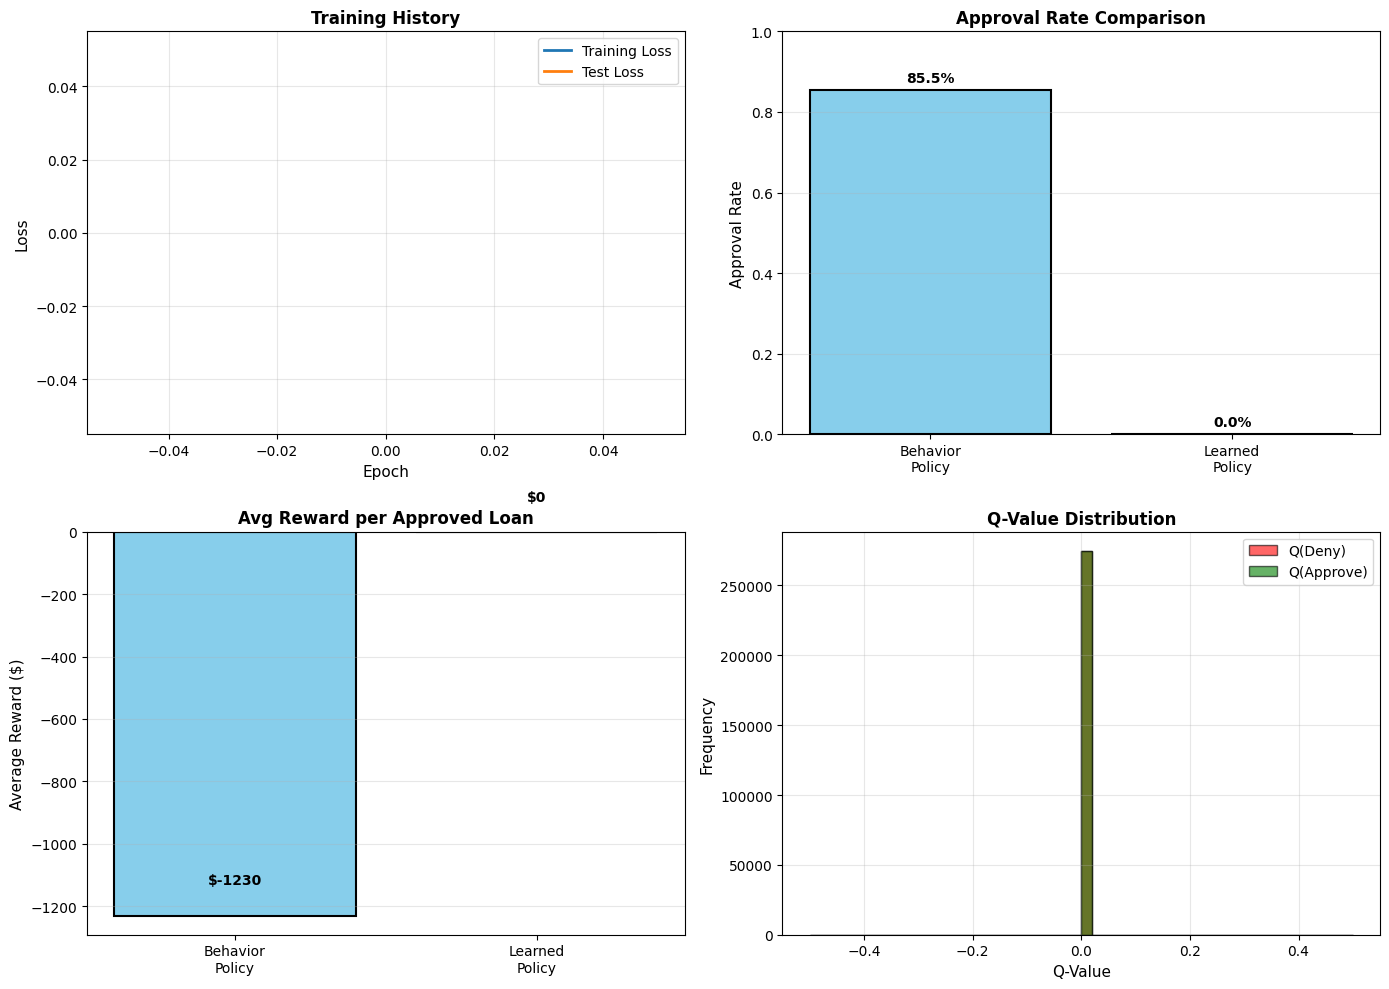

Visualization saved as 'offline_rl_policy_evaluation.png'

Step 7: Example Predictions
----------------------------------------------------------------------

Example Loan Approval Decisions:

Sample   Q(Deny)      Q(Approve)   Decision    
--------------------------------------------
244699   $0.00        $0.00        Deny        
127063   $0.00        $0.00        Deny        
141822   $0.00        $0.00        Deny        
122351   $0.00        $0.00        Deny        
168681   $0.00        $0.00        Deny        

OFFLINE RL TRAINING COMPLETE


In [52]:
# ============================================================================
# STEP 5: Evaluate Learned Policy (FIXED - with NaN handling)
# ============================================================================

print("\nStep 5: Evaluate Learned Policy")
print("-" * 70)

q_network.eval()

with torch.no_grad():
    test_states_device = test_states_tensor.to(device)
    q_values_test = q_network(test_states_device).cpu().numpy()

# Check for NaN values
print(f"Q-values shape: {q_values_test.shape}")
print(f"NaN count: {np.isnan(q_values_test).sum()}")
print(f"Inf count: {np.isinf(q_values_test).sum()}")

# Handle NaN values by replacing with 0
q_values_test = np.nan_to_num(q_values_test, nan=0.0, posinf=0.0, neginf=0.0)

print(f"Q-values after cleaning - Min: {q_values_test.min():.4f}, Max: {q_values_test.max():.4f}")

# Get predicted actions (argmax of Q-values)
predicted_actions = q_values_test.argmax(axis=1)

# Statistics
approved_by_policy = (predicted_actions == 1).sum()
approval_rate = approved_by_policy / len(predicted_actions)
behavior_approval_rate = (test_actions == 1).sum() / len(test_actions)

print(f"\nApproval Statistics:")
print(f"  Behavior policy approval rate: {behavior_approval_rate:.2%}")
print(f"  Learned policy approval rate: {approval_rate:.2%}")
print(f"  Change: {(approval_rate - behavior_approval_rate):.2%}")

# Reward analysis
approved_mask_learned = predicted_actions == 1
approved_mask_behavior = test_actions == 1

avg_reward_learned = test_rewards[approved_mask_learned].mean() if approved_mask_learned.sum() > 0 else 0
avg_reward_behavior = test_rewards[approved_mask_behavior].mean() if approved_mask_behavior.sum() > 0 else 0

print(f"\nReward Performance (Approved Loans Only):")
print(f"  Behavior policy avg reward: ${avg_reward_behavior:.2f}")
print(f"  Learned policy avg reward: ${avg_reward_learned:.2f}")

# Total rewards
total_reward_learned = test_rewards[approved_mask_learned].sum()
total_reward_behavior = test_rewards[approved_mask_behavior].sum()

print(f"\n  Behavior policy total reward: ${total_reward_behavior:,.2f}")
print(f"  Learned policy total reward: ${total_reward_learned:,.2f}")

# Decision agreement
decisions_match = (predicted_actions == test_actions).sum()
agreement_rate = decisions_match / len(predicted_actions)

print(f"\nPolicy Comparison:")
print(f"  Decision agreement: {agreement_rate:.2%}")
print(f"  Both approve: {((predicted_actions == 1) & (test_actions == 1)).sum()}")
print(f"  Both deny: {((predicted_actions == 0) & (test_actions == 0)).sum()}")
print(f"  Learned approves, behavior denies: {((predicted_actions == 1) & (test_actions == 0)).sum()}")
print(f"  Learned denies, behavior approves: {((predicted_actions == 0) & (test_actions == 1)).sum()}")

# ============================================================================
# STEP 6: Visualizations (FIXED - with NaN handling)
# ============================================================================

print("\nStep 6: Generate Visualizations")
print("-" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training History
axes[0, 0].plot(train_losses, label='Training Loss', linewidth=2)
axes[0, 0].plot(test_losses, label='Test Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Loss', fontsize=11)
axes[0, 0].set_title('Training History', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Approval Rate Comparison
axes[0, 1].bar(['Behavior\nPolicy', 'Learned\nPolicy'], 
               [behavior_approval_rate, approval_rate],
               color=['skyblue', 'coral'], edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Approval Rate', fontsize=11)
axes[0, 1].set_title('Approval Rate Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate([behavior_approval_rate, approval_rate]):
    axes[0, 1].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# Plot 3: Average Reward Comparison
axes[1, 0].bar(['Behavior\nPolicy', 'Learned\nPolicy'],
               [avg_reward_behavior, avg_reward_learned],
               color=['skyblue', 'coral'], edgecolor='black', linewidth=1.5)
axes[1, 0].set_ylabel('Average Reward ($)', fontsize=11)
axes[1, 0].set_title('Avg Reward per Approved Loan', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate([avg_reward_behavior, avg_reward_learned]):
    axes[1, 0].text(i, v + 100, f'${v:.0f}', ha='center', fontweight='bold')

# Plot 4: Q-Value Distribution (FIXED - with proper data)
q_deny_values = q_values_test[:, 0]
q_approve_values = q_values_test[:, 1]

# Remove any remaining NaN or inf values for plotting
q_deny_values = q_deny_values[np.isfinite(q_deny_values)]
q_approve_values = q_approve_values[np.isfinite(q_approve_values)]

if len(q_deny_values) > 0 and len(q_approve_values) > 0:
    axes[1, 1].hist(q_deny_values, bins=50, alpha=0.6, label='Q(Deny)', color='red', edgecolor='black')
    axes[1, 1].hist(q_approve_values, bins=50, alpha=0.6, label='Q(Approve)', color='green', edgecolor='black')
    axes[1, 1].set_xlabel('Q-Value', fontsize=11)
    axes[1, 1].set_ylabel('Frequency', fontsize=11)
    axes[1, 1].set_title('Q-Value Distribution', fontsize=12, fontweight='bold')
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Fallback plot if Q-values are mostly NaN
    axes[1, 1].text(0.5, 0.5, 'Q-Values contain NaN\n(Model may need retraining)', 
                   ha='center', va='center', fontsize=12, transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Q-Value Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('offline_rl_policy_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'offline_rl_policy_evaluation.png'")

# ============================================================================
# STEP 7: Make Predictions on New Data (FIXED)
# ============================================================================

print("\nStep 7: Example Predictions")
print("-" * 70)

# Example: Get Q-values and actions for first 5 test samples
sample_indices = np.random.choice(len(test_states), 5, replace=False)

print("\nExample Loan Approval Decisions:\n")
print(f"{'Sample':<8} {'Q(Deny)':<12} {'Q(Approve)':<12} {'Decision':<12}")
print("-" * 44)

for idx in sample_indices:
    q_deny, q_approve = q_values_test[idx]
    decision = "Approve" if q_approve > q_deny else "Deny"
    print(f"{idx:<8} ${q_deny:<11.2f} ${q_approve:<11.2f} {decision:<12}")

print("\n" + "=" * 70)
print("OFFLINE RL TRAINING COMPLETE")
print("=" * 70)
